In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.shape

(9994, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


<Axes: >

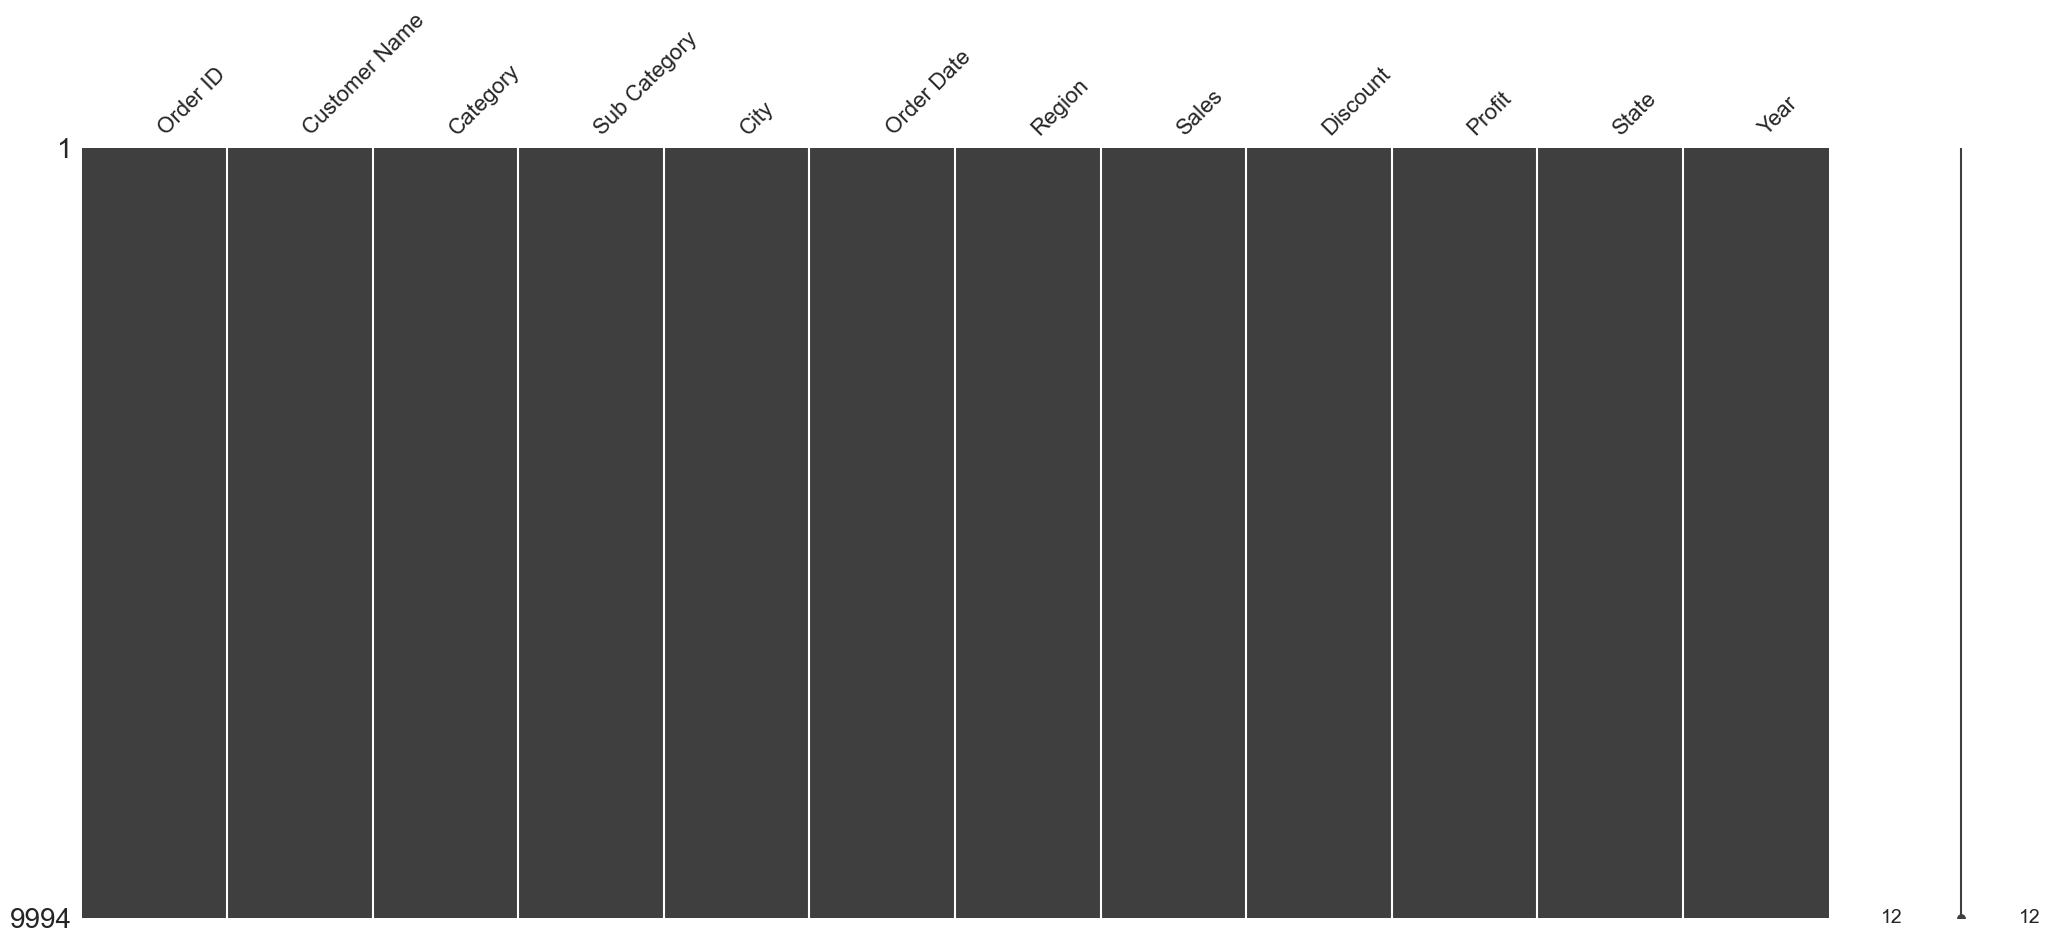

In [17]:
msno.matrix(df)

## Visualize the product category in Smart store

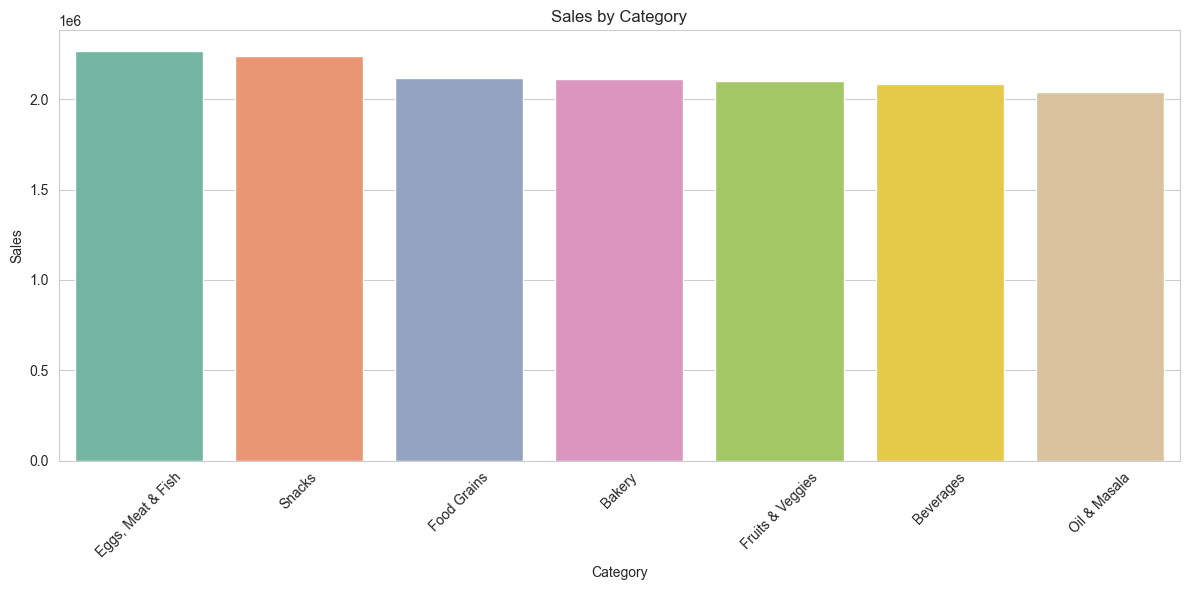

In [7]:
category_analysis = df.groupby("Category").agg({"Sales": "sum"})

category_analysis = category_analysis.sort_values(by="Sales", ascending=False)

sns.set_style("whitegrid")  
plt.figure(figsize=(12, 6))
sns.barplot(x="Category", y="Sales", data=category_analysis, palette="Set2")  
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Sales by Category")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Inference:

The visulization provides a valuable first look at the distribution of sales across categories, analysis can delve deeper to understand the underlying sales patterns and identify potential areas for improvement. As of now Eggs, Meats & Fish are top selling category, so considering focusing on choosing reliable wholeseller for fresh and good value products

This visualization provides valuable insights into the revenue distribution across different product categories.

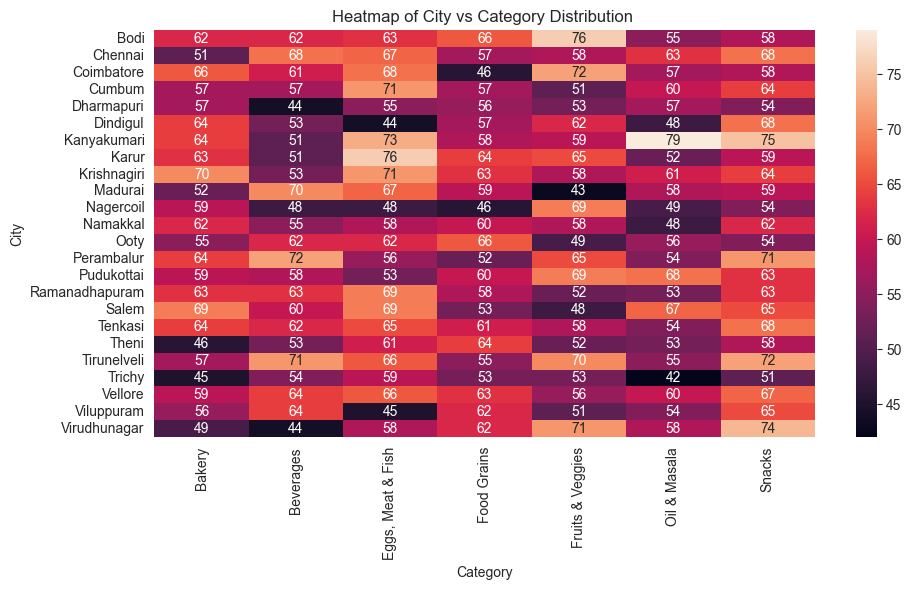

In [8]:
contingency_table = pd.crosstab(df['City'], df['Category'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d")  
plt.xlabel('Category')
plt.ylabel('City')
plt.title('Heatmap of City vs Category Distribution ')
plt.tight_layout()
plt.show()

This segmentation provides powerful insights for which cities are the top selling for the following category. considering cities low selling and focusing on those.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


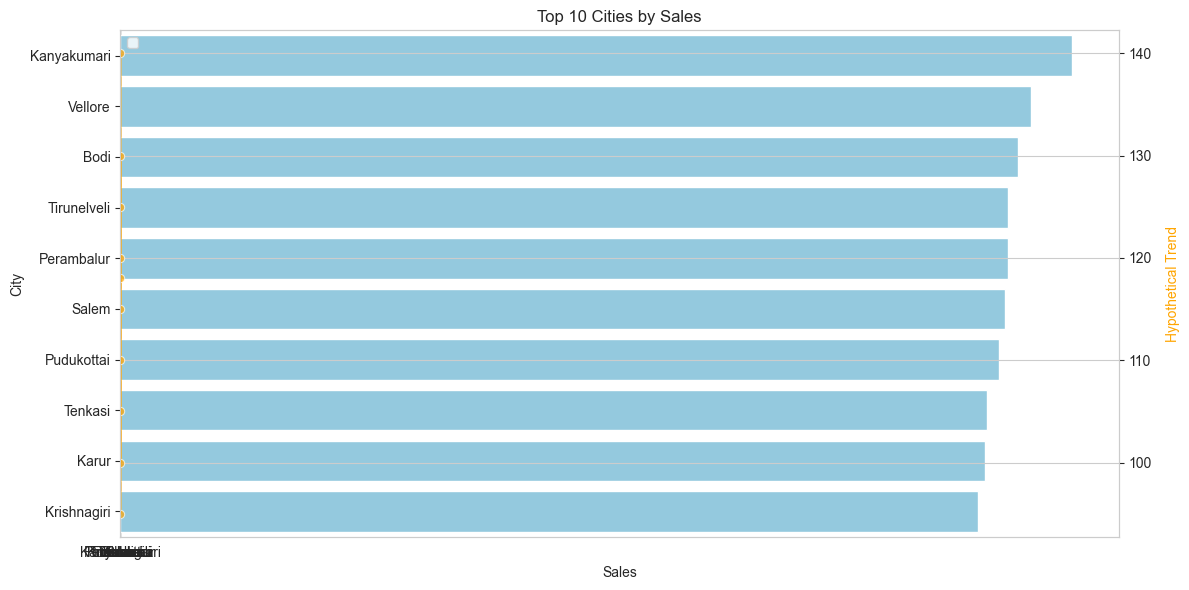

In [9]:
city_analysis = df.groupby("City").agg({"Sales": "sum"})

top_10_cities = city_analysis.sort_values(by="Sales", ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111)  

bars = sns.barplot(x="Sales", y="City", data=top_10_cities, color="skyblue", ax=ax1) 

ax2 = ax1.twinx() 
sns.lineplot(x=top_10_cities.index, y=[100, 120, 115, 130, 105, 140, 110, 125, 95, 118], color="orange", linestyle="-", marker="o", alpha=0.7, ax=ax2)  # Customize line style and transparency

plt.xlabel("Sales")
plt.ylabel("City", labelpad=10)  
ax2.set_ylabel('Hypothetical Trend', color='orange')  
plt.title("Top 10 Cities by Sales")
plt.xticks(rotation=0)  

plt.grid(axis='x', linestyle='--', alpha=0.6)  
plt.legend(loc='upper left')  

plt.tight_layout()
plt.show()

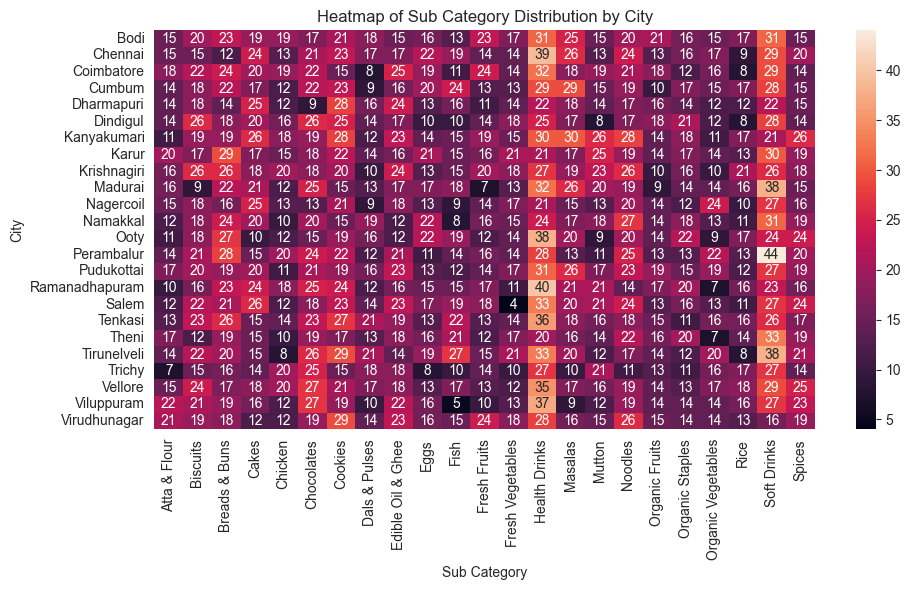

In [10]:
import seaborn as sns

contingency_table = pd.crosstab(df['City'], df['Sub Category'])  # Create contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d")  # Annotate with counts and format as integers
plt.xlabel('Sub Category')
plt.ylabel('City')
plt.title('Heatmap of Sub Category Distribution by City')
plt.tight_layout()
plt.show()


## Top Selling and High Margin Products

Top-selling products within each subcategory:
            Sub Category  Sales   Profit
9851       Health Drinks   2500   325.00
8249               Cakes   2500   225.00
1412  Organic Vegetables   2500  1025.00
9972          Chocolates   2500   325.00
267              Masalas   2500   425.00
2484         Soft Drinks   2500   175.00
6756        Atta & Flour   2499   149.94
7927             Cookies   2499   224.91
4291             Chicken   2499   324.87
7101                Eggs   2499   524.79
5101              Spices   2498   749.40
4942    Fresh Vegetables   2498   224.82
6558                Rice   2497   774.07
9173              Mutton   2497   399.52
3545             Noodles   2496   324.48
8035       Dals & Pulses   2495   548.90
4773            Biscuits   2494   648.44
1799   Edible Oil & Ghee   2494   847.96
7164       Breads & Buns   2493   722.97
8298     Organic Staples   2493   349.02
7551                Fish   2492   124.60
6085      Organic Fruits   2492   822.36
4602       

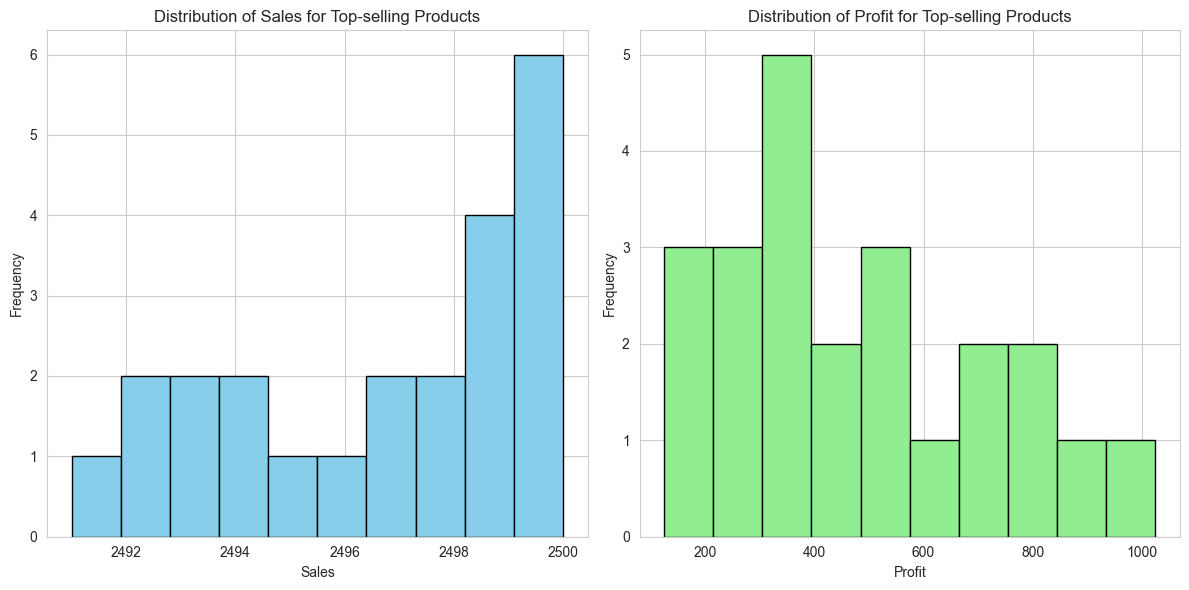

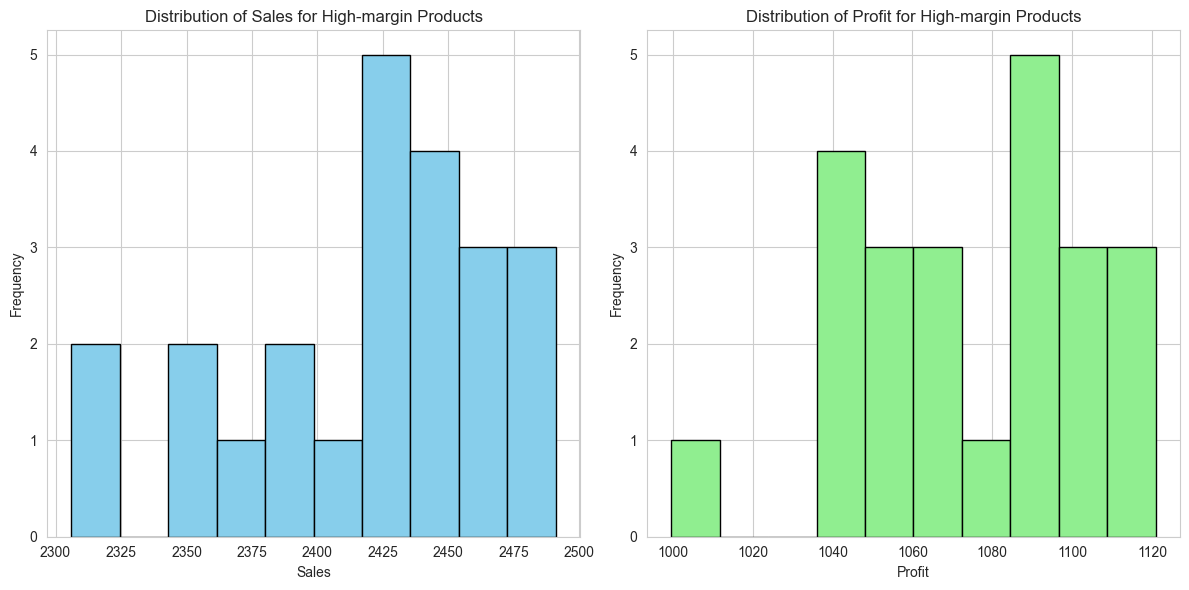

In [11]:
subcategory_stats = df.groupby('Sub Category').agg({'Sales': 'sum', 'Profit': 'mean'}).reset_index()

top_selling_products = df.sort_values(by='Sales', ascending=False).groupby('Sub Category').head(1)


high_margin_products = df.sort_values(by='Profit', ascending=False).groupby('Sub Category').head(1)

print("Top-selling products within each subcategory:")
print(top_selling_products[['Sub Category', 'Sales', 'Profit']])

print("\nHigh-margin products within each subcategory:")
print(high_margin_products[['Sub Category', 'Sales', 'Profit']])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(top_selling_products['Sales'], color='skyblue', edgecolor='black', bins=10)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales for Top-selling Products')
plt.subplot(1, 2, 2)
plt.hist(top_selling_products['Profit'], color='lightgreen', edgecolor='black', bins=10)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit for Top-selling Products')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(high_margin_products['Sales'], color='skyblue', edgecolor='black', bins=10)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales for High-margin Products')
plt.subplot(1, 2, 2)
plt.hist(high_margin_products['Profit'], color='lightgreen', edgecolor='black', bins=10)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit for High-margin Products')
plt.tight_layout()
plt.show()

This segmentation includes segmentation on top-selling products and high-margin products

From the plot above it can be seen that which products are dominate.

Weekly Order Segmentation:
      Order ID   Sales
week                  
1           70  100673
2           78  117584
3           84  130762
4           79  121175
5          120  179037
6           66   98551
7           86  133837
8           65  100480
9          109  163378
10         143  219905
11         172  256752
12         164  252648
13         147  223766
14         163  240547
15         175  264606
16         151  227963
17         132  203208
18         176  246224
19         152  219568
20         156  228738
21         165  246161
22         181  271261
23         161  255078
24         195  290293
25         167  234713
26         151  225252
27         162  247711
28         163  245704
29         168  253659
30         167  259235
31         104  157218
32         170  249831
33         151  227576
34         194  281342
35         243  370833
36         290  437392
37         354  527632
38         344  502970
39         266  400325
40         207  299685
41     

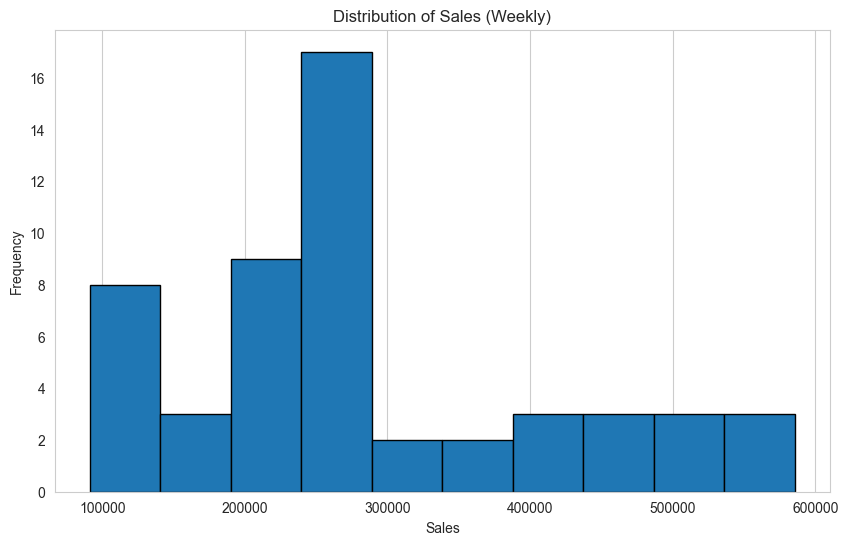

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')

month_segments = df['Order Date'].dt.month_name()
week_segments = df['Order Date'].dt.isocalendar().week
quarter_segments = df['Order Date'].dt.quarter
day_segments = df['Order Date'].dt.day_name()

weekly_data = df.groupby(week_segments).agg({
    'Order ID': 'count',
    'Sales': 'sum'
})

print("Weekly Order Segmentation:")
print(weekly_data)

plt.figure(figsize=(10, 6))
plt.hist(weekly_data['Sales'], bins=10, edgecolor='black') 
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales (Weekly)')
plt.grid(axis='y')
plt.show()

Missing Values:
Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

Summary Statistics:
       Order ID Customer Name Category   Sub Category         City  \
count      9994          9994     9994           9994         9994   
unique     9994            50        7             23           24   
top         OD1        Amrish   Snacks  Health Drinks  Kanyakumari   
freq          1           227     1514            719          459   
mean        NaN           NaN      NaN            NaN          NaN   
min         NaN           NaN      NaN            NaN          NaN   
25%         NaN           NaN      NaN            NaN          NaN   
50%         NaN           NaN      NaN            NaN          NaN   
75%         NaN           NaN      NaN            NaN          NaN   
max         NaN           NaN      NaN   

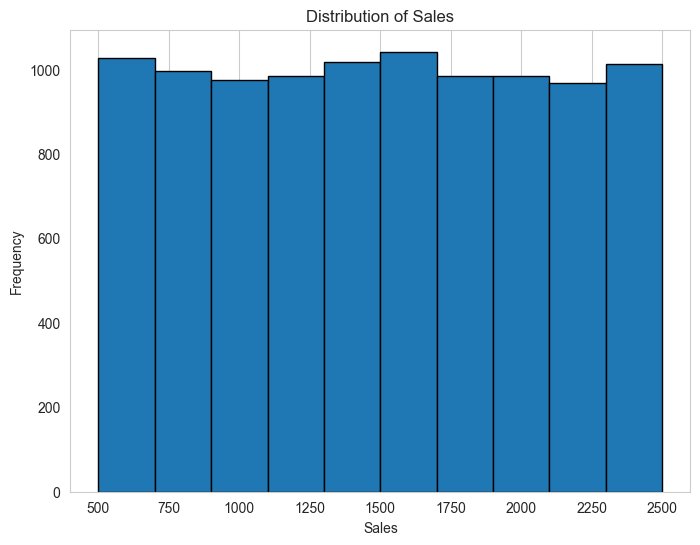


Correlation Matrix:
             Sales  Discount
Sales     1.000000 -0.005512
Discount -0.005512  1.000000


In [13]:
df = pd.DataFrame(df)

print("Missing Values:")
print(df.isnull().sum())  
print("\nSummary Statistics:")
print(df.describe(include='all'))  
print("\nData by Category:")
category_stats = df.groupby('Category').agg({
    'Sales': ['sum', 'mean'],
    'Discount': 'mean'
})
print(category_stats) 

plt.figure(figsize=(8, 6))
plt.hist(df['Sales'], bins=10, edgecolor='black')  
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.grid(axis='y')
plt.show()

correlation_matrix = df[['Sales', 'Discount']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

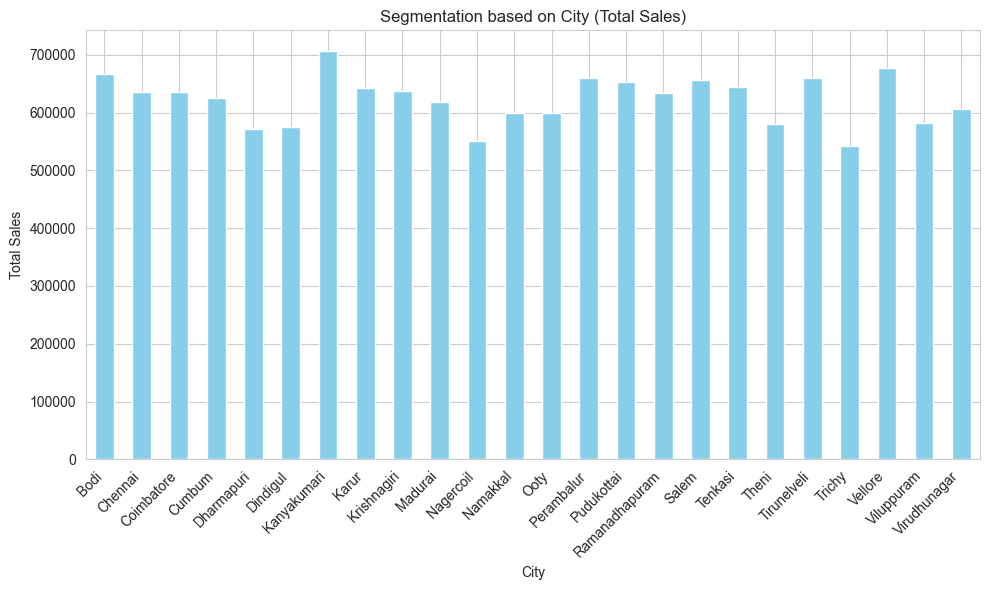

In [14]:
city_sales = df.groupby('City')['Sales'].sum()
city_sales_sort = city_sales.sort_values(ascending=False)
# Plot the graph
plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Segmentation based on City (Total Sales)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

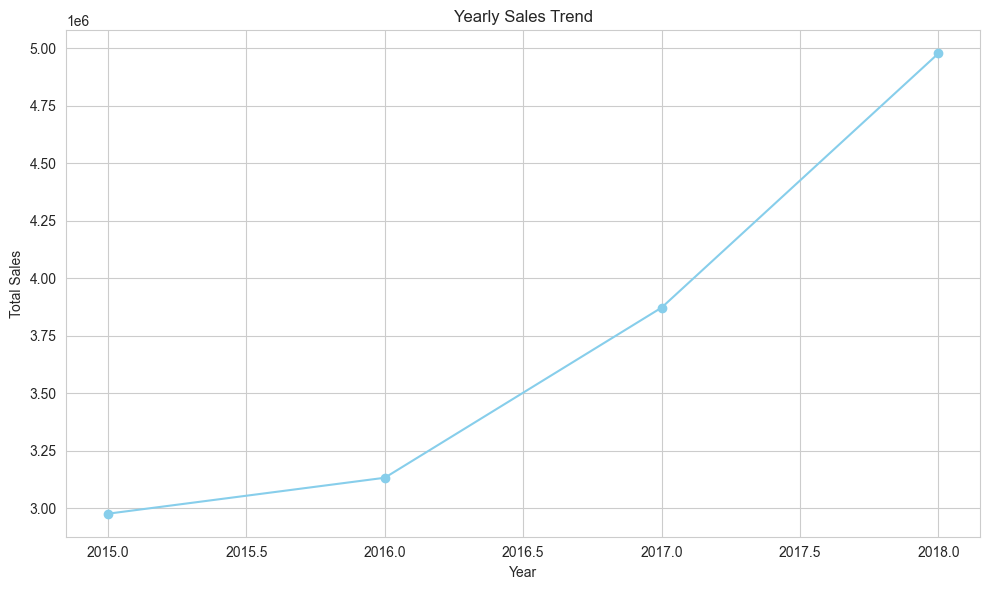

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Group by year and calculate total sales
yearly_sales = df.groupby('Year')['Sales'].sum()

# Plot the graph
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()